In [9]:
%run ./tucu-saltena-fun.ipynb

In [10]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import netCDF4

In [11]:
# to mount 
#sudo sshfs -o allow_other aliagadi@sisu-login2.csc.fi:/wrk/aliagadi/DONOTREMOVE/saltena_2018/tucu-april-data/ ./tucu-april-data
dir = '../tucu-april-data/WPS/'
dir = '../tucu-april-data/WRF/'

In [12]:
all_files = pd.DataFrame(os.listdir(dir),columns = ['name'])

In [39]:
boo = all_files.name.str.contains('wrfout_d0') & all_files.name.str.contains('d0')
met_em_files = all_files[boo]
met_em_files = met_em_files.reset_index(drop=True)
met_em_files['d']=None
_l = ['d01','d02','d03','d04']
l = 'd01'
for l in _l:
    _b = met_em_files.name.str.contains(l)
    met_em_files.loc[_b,'d'] = l 
met_em_files.head()

,name,d
0,wrfout_d02_2018-04-05_12:00:00,d02
1,wrfout_d04_2018-04-05_12:00:00,d04
2,wrfout_d03_2018-04-05_06:00:00,d03
3,wrfout_d01_2018-04-05_18:00:00,d01
4,wrfout_d03_2018-04-05_18:00:00,d03


In [14]:
import os.path
file = met_em_files[met_em_files.d=='d04'].name.iloc[0]
file_path = os.path.join(dir,file) 
file_path

'../tucu-april-data/WRF/wrfout_d04_2018-04-05_12:00:00'

In [15]:
file_ds = netcdf_dataset(file_path, 'r')

In [16]:
import di_python.ya_esta as ye 

In [17]:
var = file_ds.variables
var = list(var)
var = pd.DataFrame(var,columns=['variable'] )
boo = var.variable.str.contains('LAT')
# varp = ye.partition(var,15) 
# pd.DataFrame(varp)
var[boo]

,variable
1,XLAT
163,XLAT_U
165,XLAT_V
168,CLAT


In [18]:
import wrf

In [19]:
doms = ['d01','d02','d03','d04']
dom_dict = {} 
for d in doms:
    file = met_em_files[met_em_files.d==d].name.iloc[0]
    file_path = os.path.join(dir,file)  
    dom_dict[d]=get_lola(file_path)

dom_dict

{'d01': (-89.19097, -43.409035, -32.02111, -0.67884064),
 'd02': (-78.68283, -53.917175, -26.295033, -7.221092),
 'd03': (-70.92095, -61.97506, -20.533798, -13.877754),
 'd04': (-68.826996, -67.75261, -16.45932, -15.648087)}

In [20]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
import cartopy.io.img_tiles as cimgt

## Domain for the first run 

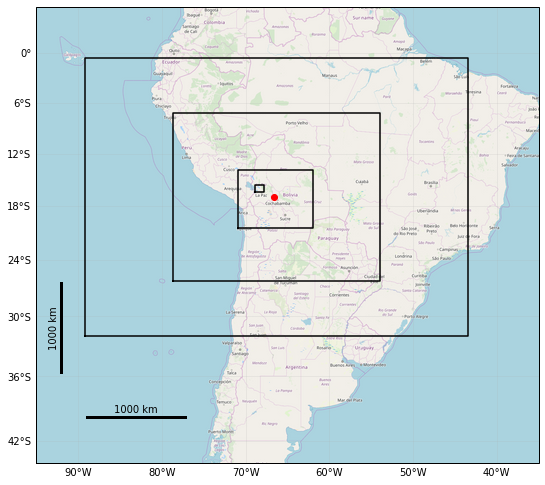

In [21]:
extent = [-95,-35,-40,5]

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER

ax.set_extent(extent)

for d in doms:
    ax_draw_sq(ax,dom_dict[d])
ax.scatter([-66.6],[-17])
ax.add_image(request, 5, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )

scale_bar(ax, (0.1, 0.1), 1_000)
scale_bar(ax, (0.05, 0.2), 1_000, angle=90)

### Domain 2,3,4

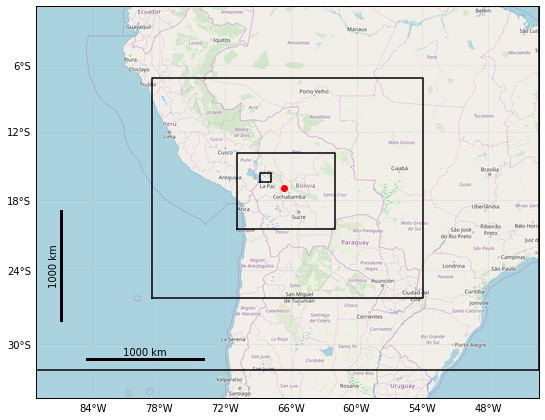

In [22]:

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER


for d in doms:
    ax_draw_sq(ax,dom_dict[d])
    
extent = dom_dict['d01']
ax.set_extent(extent)
ax.scatter([-66.6],[-17])
ax.add_image(request, 5, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )

scale_bar(ax, (0.1, 0.1), 1_000)
scale_bar(ax, (0.05, 0.2), 1_000, angle=90)

### Domain 3,4

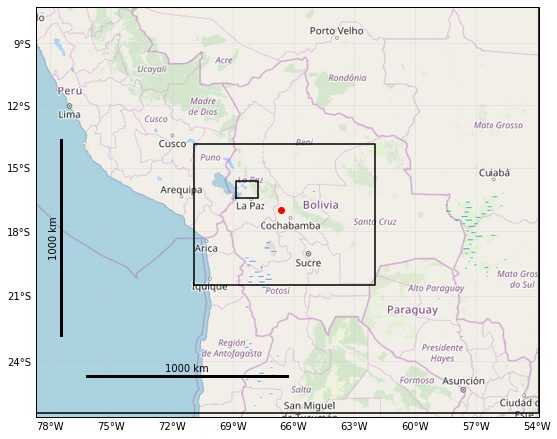

In [23]:

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER


for d in doms:
    ax_draw_sq(ax,dom_dict[d])
    
extent = dom_dict['d02']
ax.set_extent(extent)
ax.scatter([-66.6],[-17])
ax.add_image(request, 5, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )

scale_bar(ax, (0.1, 0.1), 1_000)
scale_bar(ax, (0.05, 0.2), 1_000, angle=90)

### Domain 4

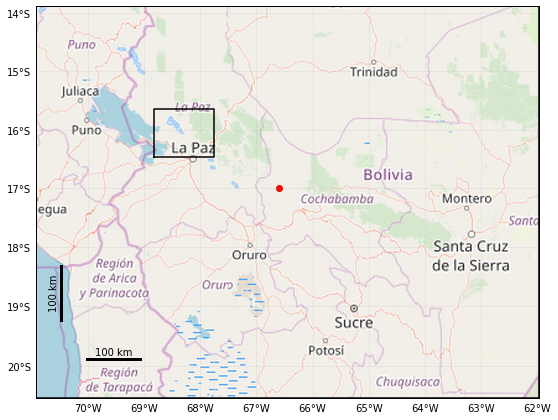

In [24]:

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER


for d in doms:
    ax_draw_sq(ax,dom_dict[d])
    
extent = dom_dict['d03']
ax.set_extent(extent)
ax.scatter([-66.6],[-17])
ax.add_image(request, 6, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )

scale_bar(ax, (0.1, 0.1), 100)
scale_bar(ax, (0.05, 0.2), 100, angle=90)

### Domain 4 close up

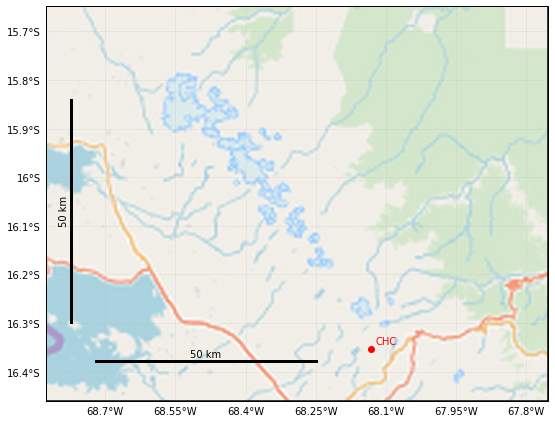

In [25]:

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER


for d in doms:
    ax_draw_sq(ax,dom_dict[d])
    
extent = dom_dict['d04']
ax.set_extent(extent)
ax.scatter([-66.6],[-17])
ax.add_image(request, 8, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )
ax.scatter( *ye.LOLA_CHC,c='red',
    transform=cartopy.crs.PlateCarree()
       )

ax.text( 
    *np.array(ye.LOLA_CHC) + .01,
    'CHC',
    color='red',
    transform=cartopy.crs.PlateCarree()
       )

scale_bar(ax, (0.1, 0.1), 50)
scale_bar(ax, (0.05, 0.2), 50, angle=90)

In [52]:
_b = met_em_files.d=='d03'
fp = met_em_files[_b]['name'].iloc[0]
fp = os.path.join(dir,fp)
file_ds = netcdf_dataset(fp, 'r')
la=wrf.getvar(file_ds,"XLAT")
lo=wrf.getvar(file_ds,"XLONG")

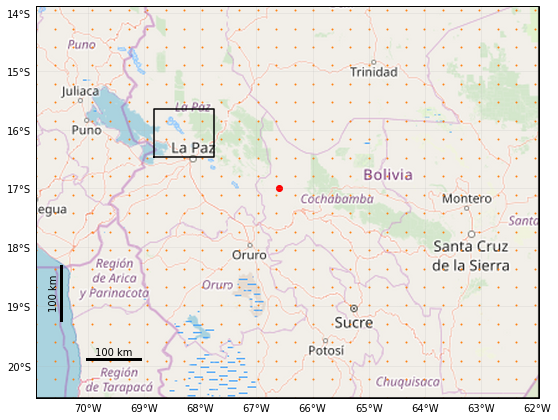

In [57]:

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER


for d in doms:
    ax_draw_sq(ax,dom_dict[d])
    
extent = dom_dict['d03']
ax.set_extent(extent)
ax.scatter([-66.6],[-17])
ax.add_image(request, 6, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )
_i = 10
ax.scatter(
    lo.values[::_i,::_i], 
    la.values[::_i,::_i],
    transform=cartopy.crs.PlateCarree(),
    s=1
)

scale_bar(ax, (0.1, 0.1), 100)
scale_bar(ax, (0.05, 0.2), 100, angle=90)

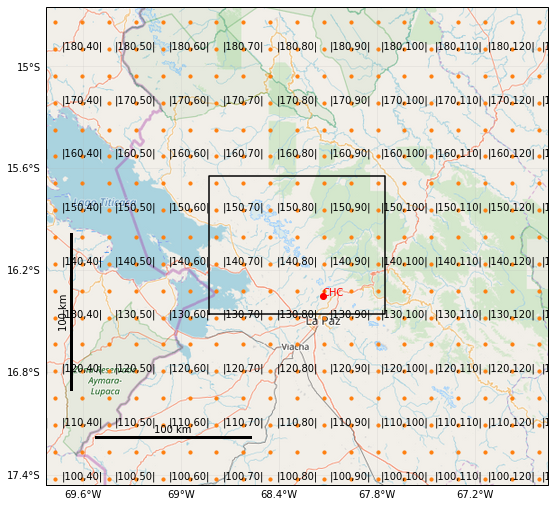

In [149]:
zoom_size = 8 
request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
gl = ax.gridlines(draw_labels=True, alpha=0.2)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER

gl.yformatter = LATITUDE_FORMATTER


for d in doms:
    ax_draw_sq(ax,dom_dict[d])
    
extent = dom_dict['d04']
extent = np.array(extent)+np.array([-1,1,-1,1]) 
ax.set_extent(extent)
ax.scatter([-66.6],[-17])
ax.add_image(request, zoom_size, interpolation='spline36')

ax.scatter( [-66.6],[-17],c='red',
    transform=cartopy.crs.PlateCarree()
       )
_i = 5
ax.scatter(
    lo.values[::_i,::_i], 
    la.values[::_i,::_i],
    transform=cartopy.crs.PlateCarree(),
    s=10
)

_i=10
loi = lo.values[::_i,::_i]
lai = la.values[::_i,::_i]
ii,jj = loi.shape
for i in range(ii):
    for j in range(jj):
        ax.text(
            loi[i,j],
            lai[i,j],
            "|{},{}|".format(i*_i,j*_i),
            transform=cartopy.crs.PlateCarree(),
            clip_on=True,
            ha='center'
        )
ax.scatter(*ye.LOLA_CHC, c='red',transform=cartopy.crs.PlateCarree())
ax.text(*ye.LOLA_CHC,'CHC', color='red',transform=cartopy.crs.PlateCarree())
scale_bar(ax, (0.1, 0.1), 100)
scale_bar(ax, (0.05, 0.2), 100, angle=90)

I think i should modify i and j (+10 both) to better capture chc and la paz